# Required Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import RandomOverSampler

In [5]:
# Download required NLTK data
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91900\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91900\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91900\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
import pandas as pd

# Loading the dataset

In [8]:
df = pd.read_csv('merch_sales.csv')
df.head()

,Order ID,Order Date,Product ID,Product Category,Buyer Gender,Buyer Age,Order Location,International Shipping,Sales Price,Shipping Charges,Sales per Unit,Quantity,Total Sales,Rating,Review
0,189440,2024-07-21,BF1543,Clothing,Male,30,New Jersey,No,100,0,100,1,100,4,The delivery team handled the product with care.
1,187385,2024-07-20,BF1543,Clothing,Male,32,Las Vegas,No,100,0,100,1,100,3,Had slight delays but the product was in good ...
2,181844,2024-07-21,BF1544,Other,Female,26,Cardiff,Yes,9,40,49,1,49,2,Waste of Money.
3,197934,2024-08-19,BF1544,Other,Male,28,Pittsburgh,No,9,0,9,2,18,3,Had slight delays but the product was in good ...
4,122470,2024-01-06,BF1545,Other,Female,19,Miami,No,10,0,10,3,30,5,Lack of delivery delays is greatly appreciated.


# Information of the dataset

In [10]:
# Display dataset overview
print("\nDataset Overview:")
print(f"Total Rows: {df.shape[0]}, Total Columns: {df.shape[1]}")
print("\nDataset Information:")
df.info()
print("\nFirst few rows:")
display(df.head())


Dataset Overview:
Total Rows: 7394, Total Columns: 15

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7394 entries, 0 to 7393
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                7394 non-null   int64 
 1   Order Date              7394 non-null   object
 2   Product ID              7394 non-null   object
 3   Product Category        7394 non-null   object
 4   Buyer Gender            7394 non-null   object
 5   Buyer Age               7394 non-null   int64 
 6   Order Location          7394 non-null   object
 7   International Shipping  7394 non-null   object
 8   Sales Price             7394 non-null   int64 
 9   Shipping Charges        7394 non-null   int64 
 10  Sales per Unit          7394 non-null   int64 
 11  Quantity                7394 non-null   int64 
 12  Total Sales             7394 non-null   int64 
 13  Rating                  7394 no

,Order ID,Order Date,Product ID,Product Category,Buyer Gender,Buyer Age,Order Location,International Shipping,Sales Price,Shipping Charges,Sales per Unit,Quantity,Total Sales,Rating,Review
0,189440,2024-07-21,BF1543,Clothing,Male,30,New Jersey,No,100,0,100,1,100,4,The delivery team handled the product with care.
1,187385,2024-07-20,BF1543,Clothing,Male,32,Las Vegas,No,100,0,100,1,100,3,Had slight delays but the product was in good ...
2,181844,2024-07-21,BF1544,Other,Female,26,Cardiff,Yes,9,40,49,1,49,2,Waste of Money.
3,197934,2024-08-19,BF1544,Other,Male,28,Pittsburgh,No,9,0,9,2,18,3,Had slight delays but the product was in good ...
4,122470,2024-01-06,BF1545,Other,Female,19,Miami,No,10,0,10,3,30,5,Lack of delivery delays is greatly appreciated.


In [11]:
# Handling missing values
df.dropna(subset=['Review'], inplace=True)
print("\nMissing Values after Cleanup:")
print(df.isnull().sum())


Missing Values after Cleanup:
Order ID                  0
Order Date                0
Product ID                0
Product Category          0
Buyer Gender              0
Buyer Age                 0
Order Location            0
International Shipping    0
Sales Price               0
Shipping Charges          0
Sales per Unit            0
Quantity                  0
Total Sales               0
Rating                    0
Review                    0
dtype: int64


In [12]:
# Text Preprocessing
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

df['cleaned_review'] = df['Review'].apply(preprocess_text)

In [13]:
# Sentiment Analysis using VADER
sia = SentimentIntensityAnalyzer()
df['vader_score'] = df['cleaned_review'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment'] = df['vader_score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))



C:\Users\91900\AppData\Local\Temp\ipykernel_6320\39143279.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment'], palette='coolwarm')


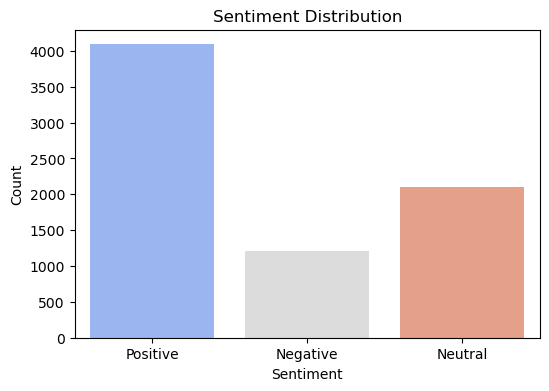

In [14]:
# Visualizing Sentiment Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['sentiment'], palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

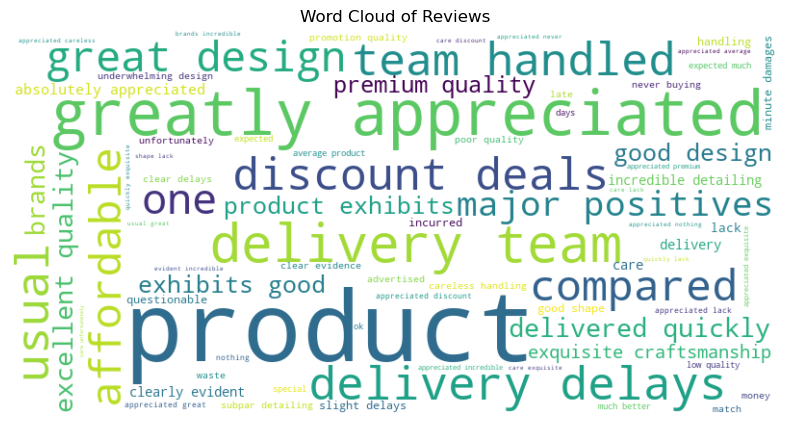

In [15]:
# Word Cloud Visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['cleaned_review']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

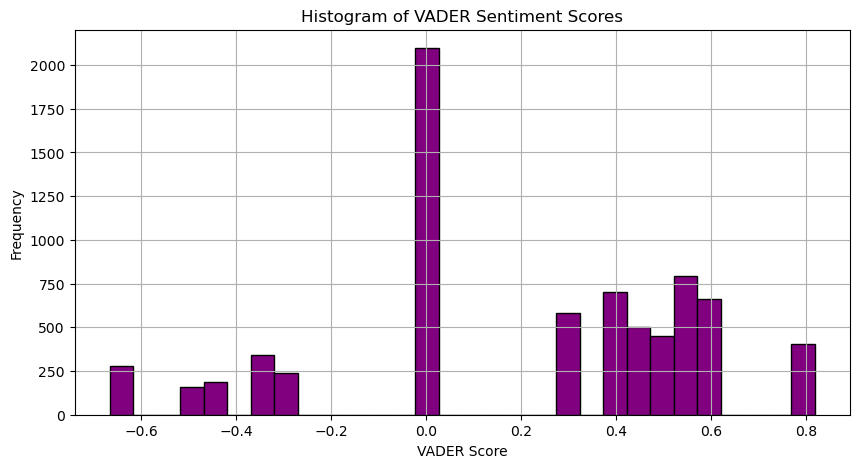

In [16]:
# Additional Visualizations
plt.figure(figsize=(10,5))
df['vader_score'].hist(bins=30, color='purple', edgecolor='black')
plt.title('Histogram of VADER Sentiment Scores')
plt.xlabel('VADER Score')
plt.ylabel('Frequency')
plt.show()

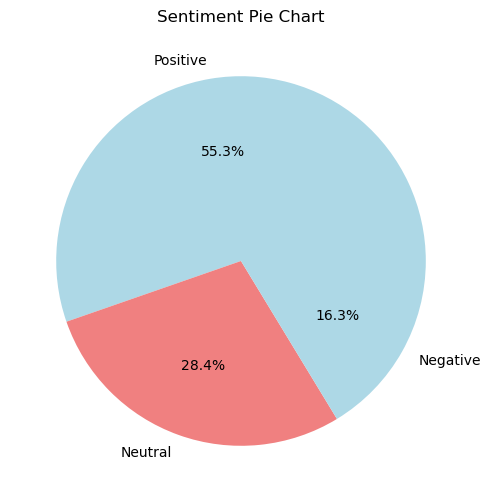

In [17]:
plt.figure(figsize=(6,6))
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Sentiment Pie Chart')
plt.ylabel('')
plt.show()

C:\Users\91900\AppData\Local\Temp\ipykernel_6320\3733831312.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['sentiment'], y=df['vader_score'], palette='coolwarm')


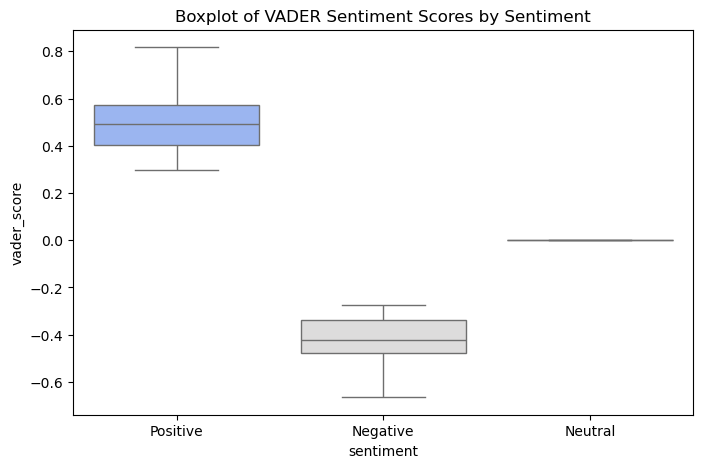

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['sentiment'], y=df['vader_score'], palette='coolwarm')
plt.title('Boxplot of VADER Sentiment Scores by Sentiment')
plt.show()

In [19]:
# Text Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['cleaned_review'])
y = df['sentiment'].map({'Positive': 1, 'Negative': -1,'Neutral' : 0})

In [20]:
# Handling Class Imbalance
oversampler = RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [21]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [22]:
# Define models
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=200, random_state=42),
    'SVM': SVC(probability=True, kernel='linear')
}


Training Naive Bayes...

Naive Bayes Model Evaluation:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       816
           0       1.00      1.00      1.00       818
           1       1.00      1.00      1.00       821

    accuracy                           1.00      2455
   macro avg       1.00      1.00      1.00      2455
weighted avg       1.00      1.00      1.00      2455



<Figure size 800x600 with 0 Axes>

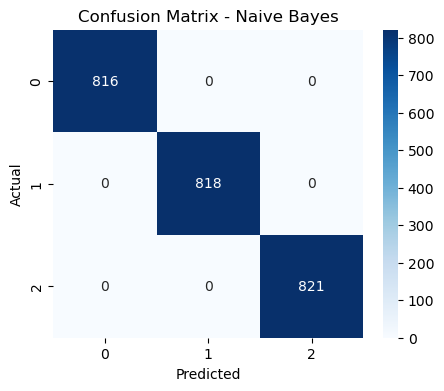

NameError: name 'fpr' is not defined

In [23]:
# Training and Evaluation
plt.figure(figsize=(8, 6))
model_results = {}
for name, model in models.items():
    print(f'\nTraining {name}...')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f'\n{name} Model Evaluation:')
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    model_results[name] = accuracy
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # ROC Curve
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)[:, 1]
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

In [ ]:
# Model Comparison
print("\nModel Performance Summary:")
for model, acc in model_results.items():
    print(f"{model}: Accuracy = {acc:.2f}")

# Best Model Selection
best_model = max(model_results, key=model_results.get)
print(f"\nBest Performing Model: {best_model} with Accuracy = {model_results[best_model]:.2f}")

In [ ]:
import pickle
file = 'NLP_1.pkl'

In [ ]:
pickle.dump(models,open(file,'wb'))

In [ ]:
df.head()

In [ ]:
df['Product Category'].unique()

In [ ]:
pickle